# 2B - Exploratory Data Analysis:

#### Prop 64 - Allows marijuana growth near schools and parks. 

The second point in the problem statement is concerned with the exposure of marijuana to minors, schoolchildren, and teenagers with the passing of Prop 64.

In the following notebook, I will be examining different trends in the marijuana `arrests` dataframe and the LAUSD `LA_pub_school` dataframe by creating scatterplots, histograms, barplots and line plots. The visualizations will provide a brief glimpse into the structure of the data.

For example, the scatter plots show densely clustered arrests near the Downtown Los Angeles area.
The barplots show that the number one marijuana arrests in 2018 is smoking and ingesting marijuana.
The histograms displays the skewness of each numerical variable except for coordinates.
The line plots show the monthly trend of marijuana arrests from 2015 to 2019.


#### Arrests Data Dictionary:

| Column Name | Type | Description |
| --- | --- | --- | 
| Report ID | int64 | ID for the Arrest | 
| Arrest Date |  DateTime | YYYY/MM/DD |
| Time | float64 | 24 hour military time |
| Area ID |  int64 | 21 LAPD stations referred to as Geographic Areas that are sequentially numbered from 1-21 |
| Area Name | object  | Area ID's name designation that references a landmark or the surrounding community that an LAPD station is responsible for|
| Reporting District | int64 |  A four-digit code that represents a sub-area within a Geographic Area | 
| Age | int64 | Age of the arrestee | 
| Sex Code | object| F - Female, M - Male |
| Descent Code | object | Arrestee's descent code |
| Charge Group Code | object | Category of arrest charge |
| Charge Group Description | object | Defines the charge provided | 
| Arrest Type Code | object | A code to indicate the type of charge the individual was arrested for. D - Dependent F - Felony I - Infraction M - Misdemeanor O - Other |
| Charge | object | The charge the individual was arrested for |
| Charge  Description | object | Defines the Charge provided |
| Address | object | Street address of crime incident |
| Location | object  | The location where the crime incident occurred. XY coordinates reflect the nearest 100 block |
| disp_0.5_mile | int64 | Number of dispensaries within 0.5 miles of each arrest | 
| disp_1_mile | int64 | Number of dispensaries within 1 mile of each arrest | 
| school_0.5_mile | int64 | Number of school(s) within 0.5 miles of each arrest | 
| school_0.5_mile | int64 | Number of school(s) within 1 mile of each arrest | 

#### LAUSD Data Dictionary:

| Column Name | Type | Description | 
| --- | --- | --- |
| School | object | School name |
| Zip Code | int64 | School's zip code |
| Grades | object | Grades offered in school |
| Local District | object | School's local district | 
| Board District | object | School's board district | 
| complete_address | object | School's address |
| lat | float | School's latitude | 
| long | float | School's longitude | 
| arrest_0.5_mile | int64 | Number of arrest(s) within 0.5 miles of each school | 
| arrest_0.5_mile | int64 | Number of arrest(s) within 1 mile of each school | 

## Arrests and LAUSD

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('fivethirtyeight')

In [2]:
arrests = pd.read_csv('../data/all_marijuana_arrests.csv')
arrests.head()

,Arrest Date,Time,Area Name,Age,Sex Code,Descent Code,Arrest Type Code,Charge Description,lat,long,disp_0.5_mile,disp_1_mile,school_0.5_mile,school_1_mile
0,2015-01-01,1610.0,Southeast,19,M,B,M,possess 28.5 grams or less of marijuana**,33.9456,-118.2739,1,2,5,16
1,2015-01-01,820.0,Hollywood,23,M,B,F,transport/sell/furnish/etc marijuana,34.1016,-118.3387,0,5,2,4
2,2015-01-02,1030.0,Pacific,24,F,W,F,transport/sell/furnish/etc marijuana,33.9920,-118.4201,1,2,5,9
3,2015-01-02,1530.0,Pacific,30,M,O,F,possession marijuana for sale,33.9440,-118.4073,0,1,0,0
4,2015-01-03,1940.0,Southwest,26,M,H,F,transport/sell/furnish/etc marijuana,34.0260,-118.3652,0,1,2,5


In [3]:
LA_pub_school = pd.read_csv('../data/LAUSD.csv')
LA_pub_school.head()

,School,Zip Code,Grades,Local District,Board District,complete_address,lat,long,arrest_0.5_mile,arrest_1_mile
0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004,34.072925,-118.292591,21,80
1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015,34.048317,-118.273235,20,106
2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311,34.251825,-118.563377,0,2
3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340,34.288514,-118.421011,1,9
4,San Pedro Senior High Gifted STEAM Magnet,90731,9-11,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731,33.730370,-118.299342,14,63


In [4]:
df_weed = pd.read_csv('../data/df_weed_updated.csv')
df_weed.head()

,name,lat,long
0,Extra Special Delivery,34.166720,-118.375185
1,Ganjarunner,34.101610,-118.302060
2,The Higher Path,34.149339,-118.439875
3,Kushfly,34.127600,-118.346690
4,MedMen West Hollywood,34.090591,-118.367290


Splitting marijuana arrests per year (2015, 2016, 2017, 2018):

In [5]:
m_2015 = arrests[arrests['Arrest Date'] < '2016-01-01']
m_2016 = arrests[(arrests['Arrest Date'] < '2017-01-01') & (arrests['Arrest Date'] >= '2016-01-01')]
m_2017 = arrests[(arrests['Arrest Date'] < '2018-01-01') & (arrests['Arrest Date'] >= '2017-01-01')]
m_2018 = arrests[(arrests['Arrest Date'] < '2019-01-01') & (arrests['Arrest Date'] >= '2018-01-01')]

### Scatterplot -  Marijuana Arrests

For the following scatterplots, I want to examine where the marijuana arrests are located.

In [6]:
def marijuana_scatterplot(df, title):
    print(f'Count of Marijuana Arrests: {len(df)}')
    fig, ax = plt.subplots(figsize =(20,10))
    plt.scatter(df['lat'], 
                df['long'], 
                c = 'purple', 
                s = 15, 
                alpha = 0.4,
                label='Possession Arrests')
    
    plt.xlabel('\nLatitude', fontsize=20)
    plt.ylabel('Longitude\n', fontsize=20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    ax.legend(fontsize=20);
    plt.title(title, fontsize=28)
    plt.tight_layout()

Visualizing all the marijuana arrests from 2015 to 2019.

Count of Marijuana Arrests: 4156


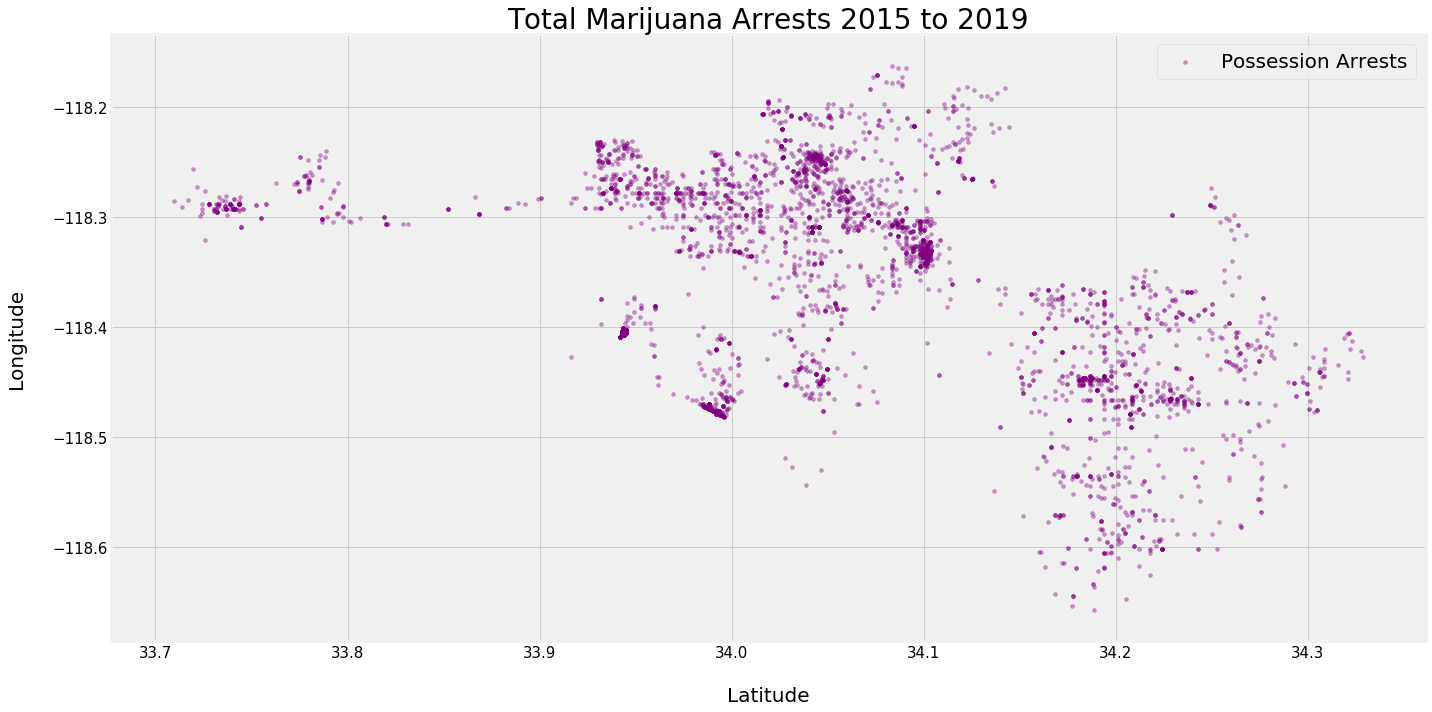

In [7]:
marijuana_scatterplot(arrests, 'Total Marijuana Arrests 2015 to 2019')

I am now going to examine the decrease in marijuana arrests from 2015 to 2018:

Count of Marijuana Arrests: 1550
Count of Marijuana Arrests: 1401
Count of Marijuana Arrests: 518
Count of Marijuana Arrests: 556


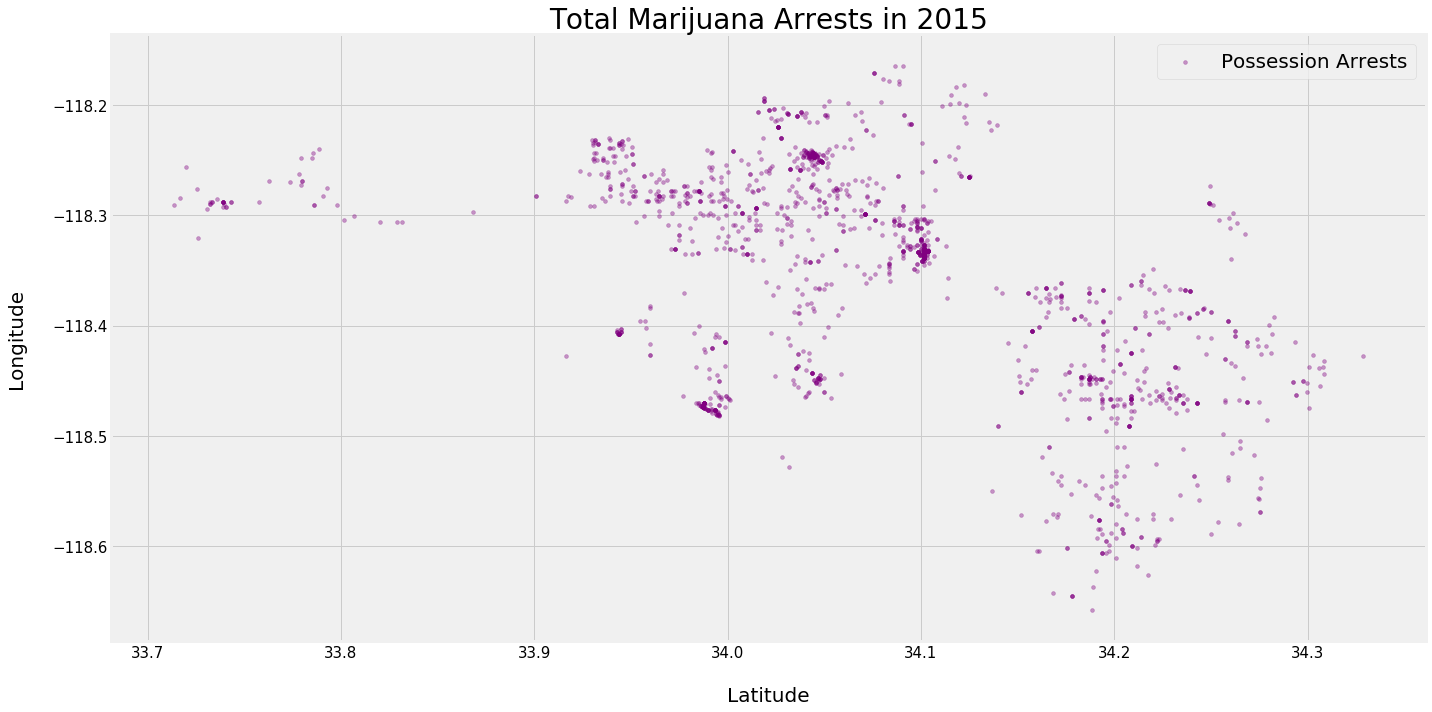

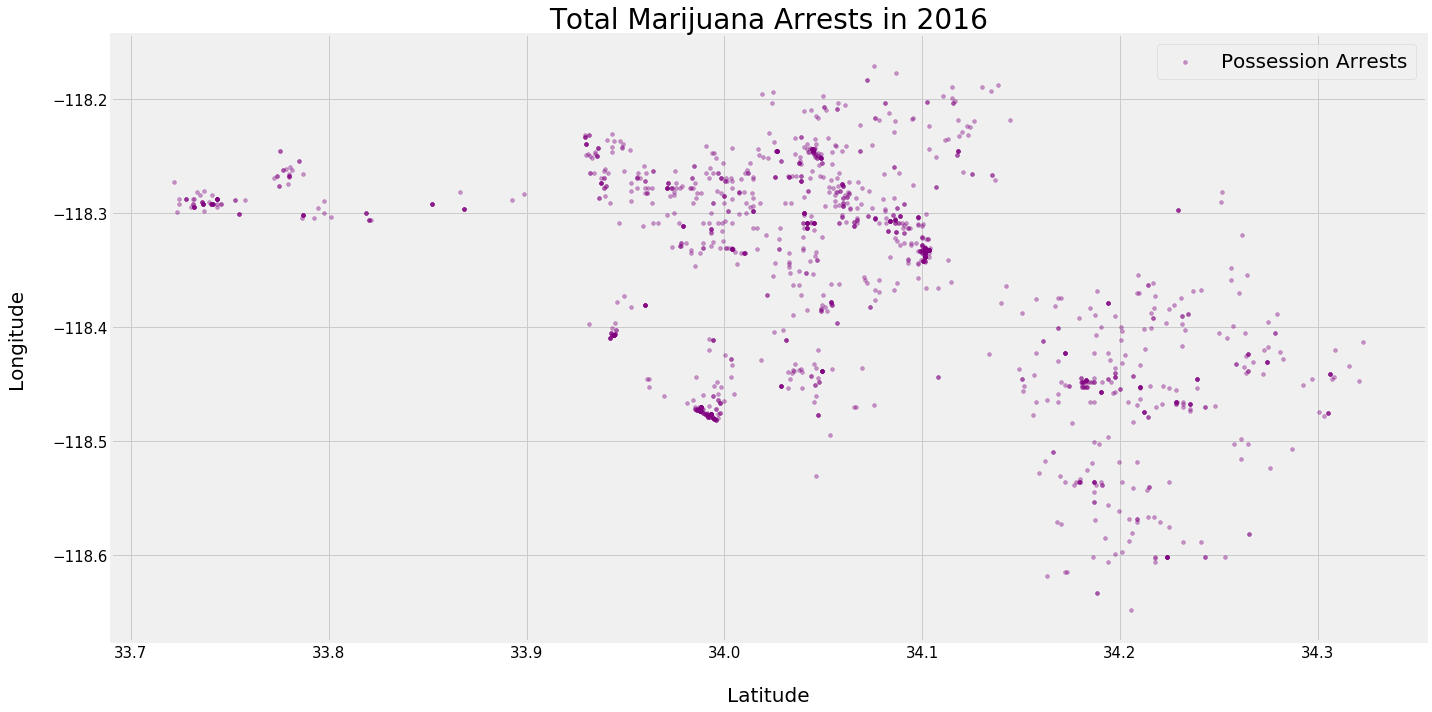

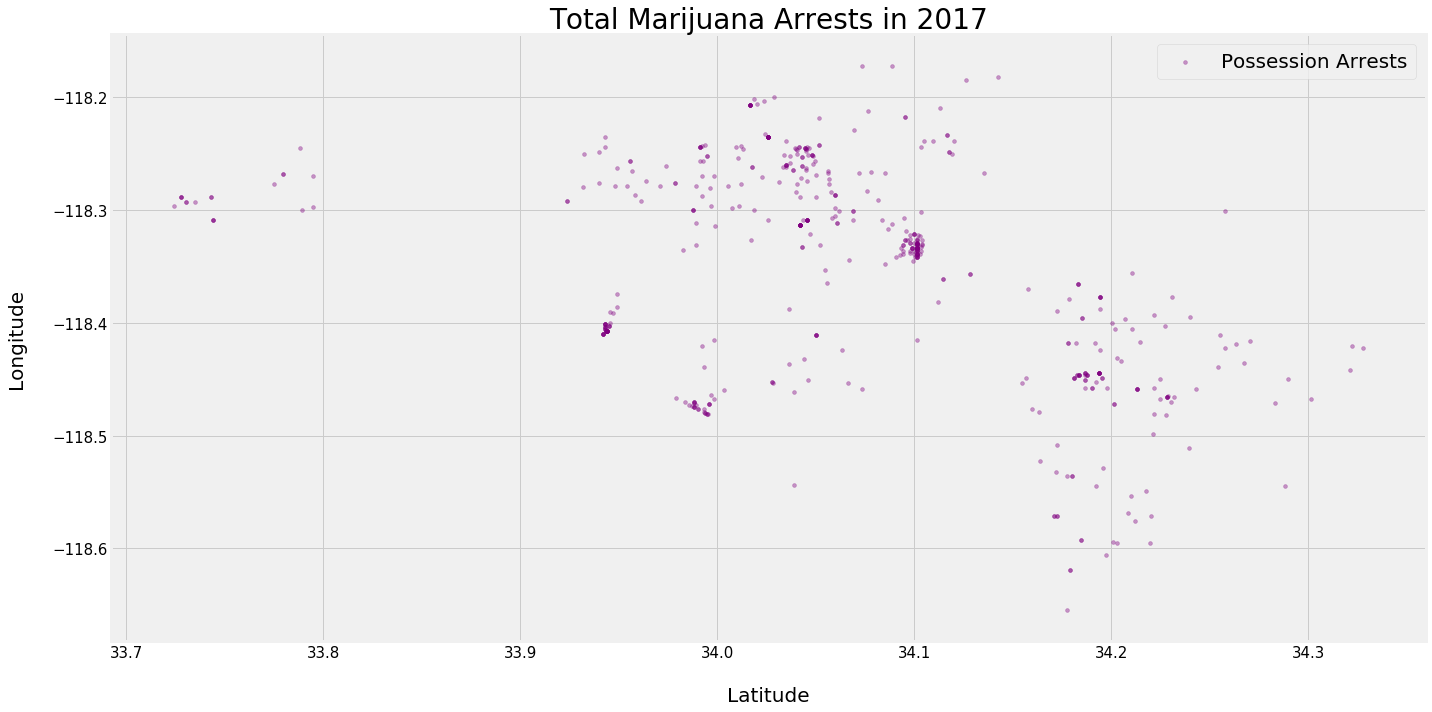

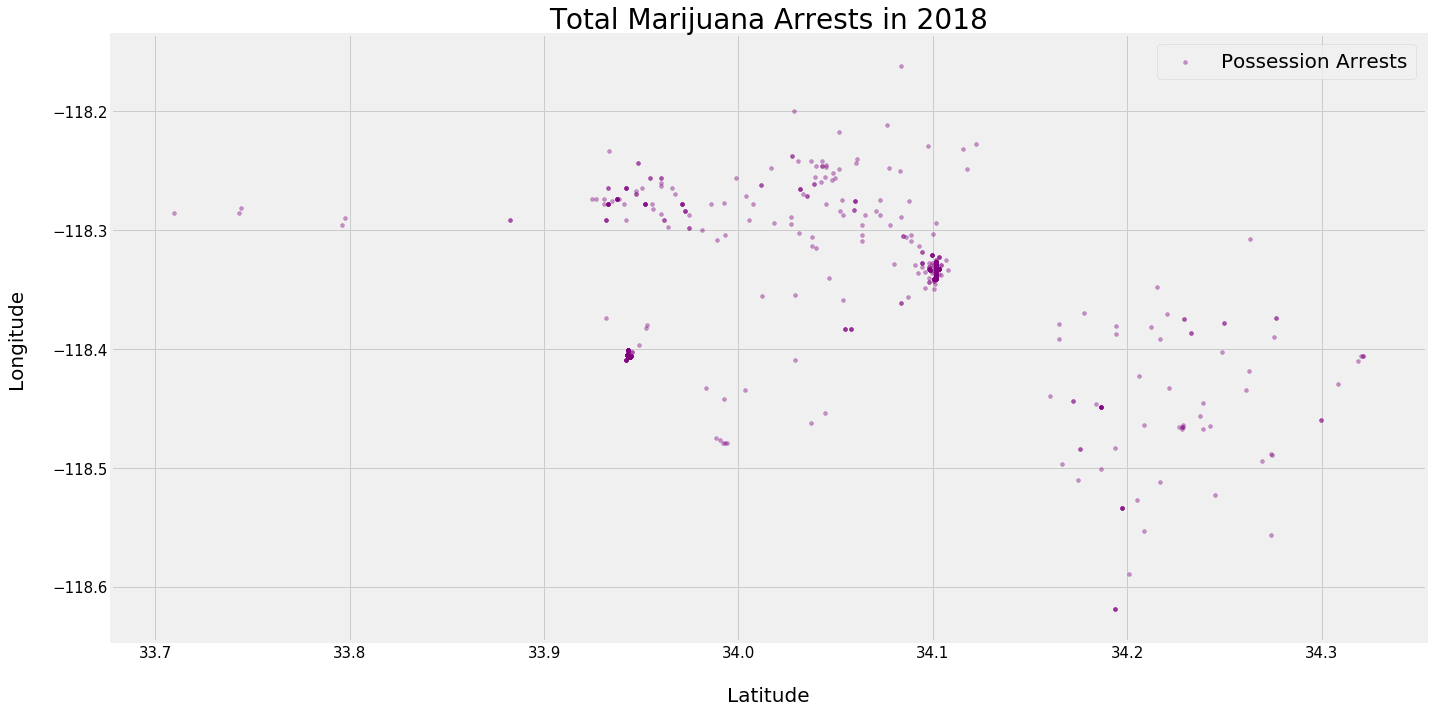

In [8]:
marijuana_scatterplot(m_2015, 'Total Marijuana Arrests in 2015')
marijuana_scatterplot(m_2016, 'Total Marijuana Arrests in 2016')
marijuana_scatterplot(m_2017, 'Total Marijuana Arrests in 2017')
marijuana_scatterplot(m_2018, 'Total Marijuana Arrests in 2018')

On a year to year basis, overall marijuana arrests have been declining, but there is a dense cluster at around the (34.1, -118.35) mark.

### Scatterplot - Marijuana Arrests and Dispensaries

For the following scatterplots, I want to examine if there is a relationship between the number of marijuana arrests per dispensary.

In [42]:
df_weed_2 = df_weed.drop(df_weed[((df_weed['long']>-118.2) & (df_weed['lat']<33.9))|
       (df_weed['long']<-118.7) | (df_weed['lat']>34.35) | (df_weed['long'] >-118.23)].index)

def marijuana_disp(df, year):
    fig, ax = plt.subplots(figsize =(20,10))
    plt.scatter(df['long'], df['lat'], label='LA Marijuana Arrests', s = 5)
    ax.scatter(df_weed_2['long'], df_weed_2['lat'], color='r', label='Dispensaries', s = 15)
    plt.title(f'{year} Marijuana Arrests and Dispensaries', fontsize=28)
    plt.xlabel('Longitude', fontsize=20)
    plt.ylabel('Latitude', fontsize=20)
    ax.legend(fontsize=20);

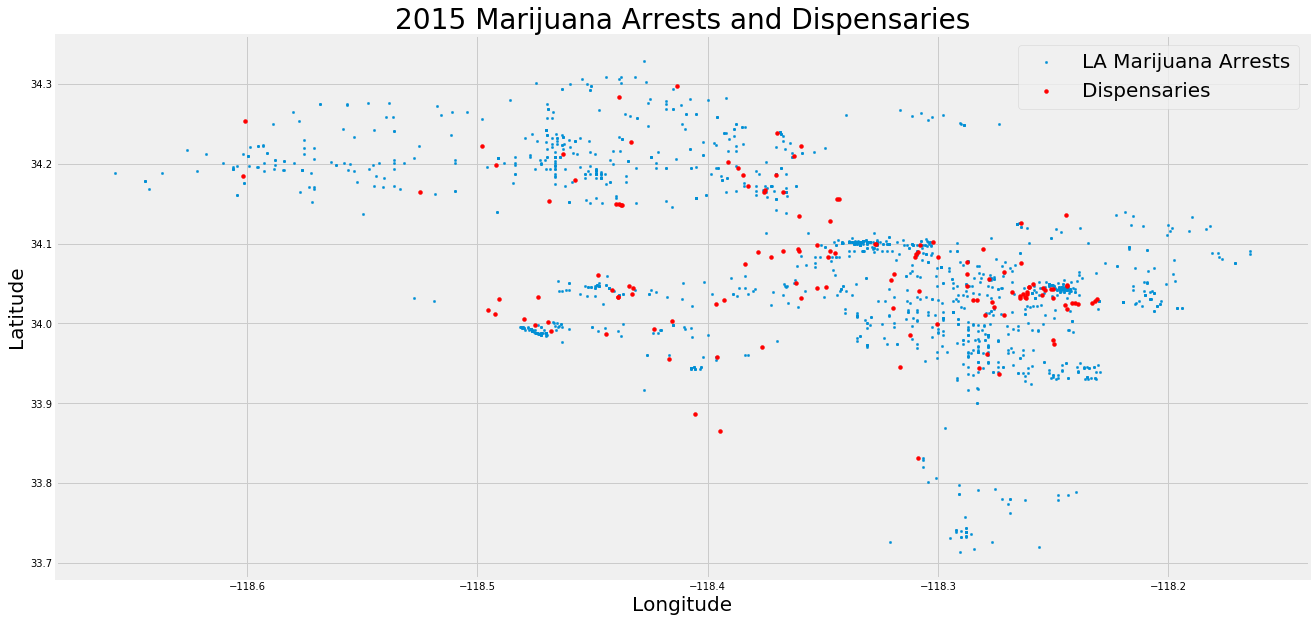

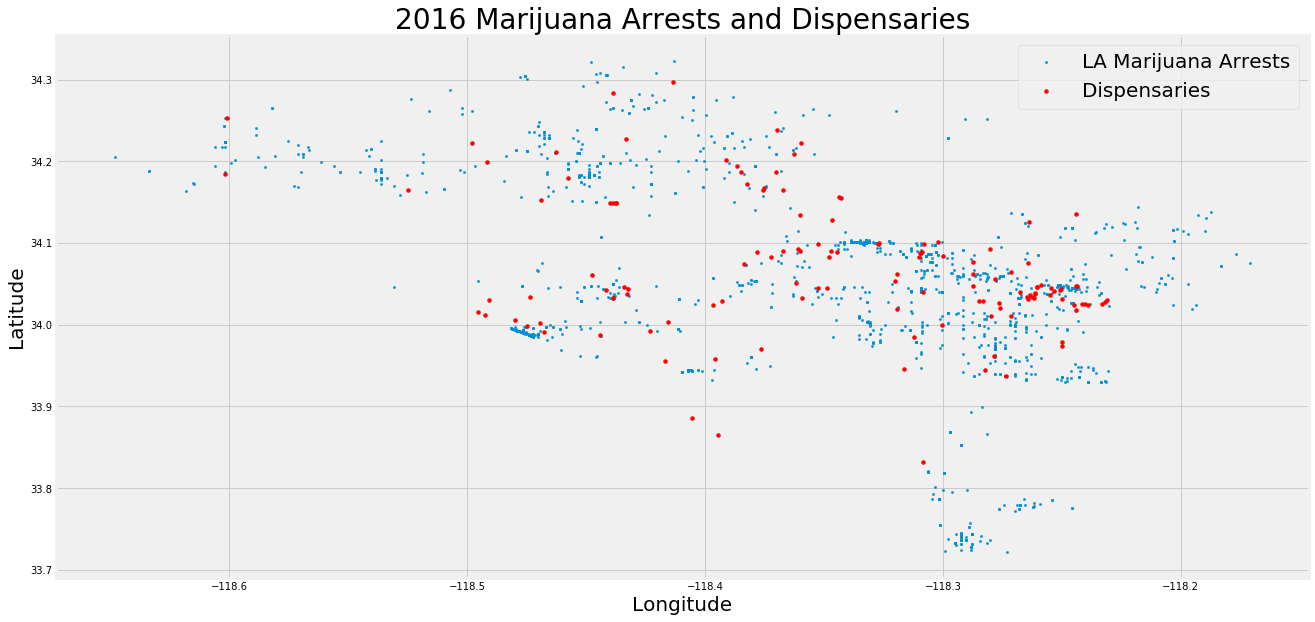

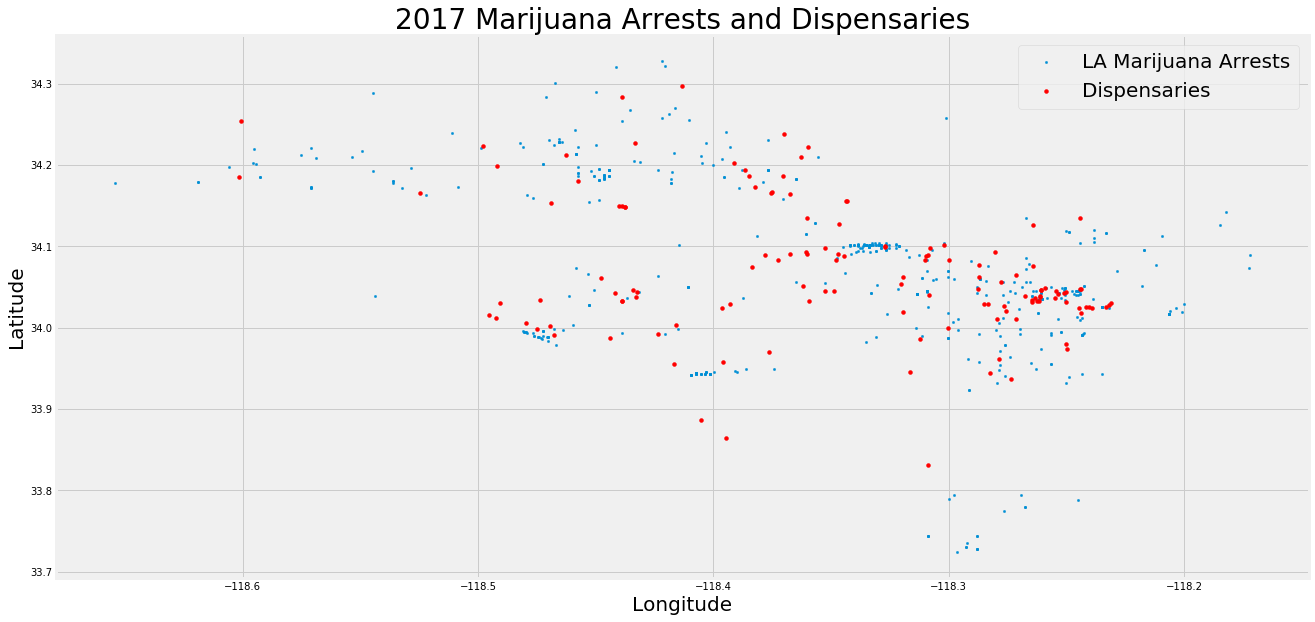

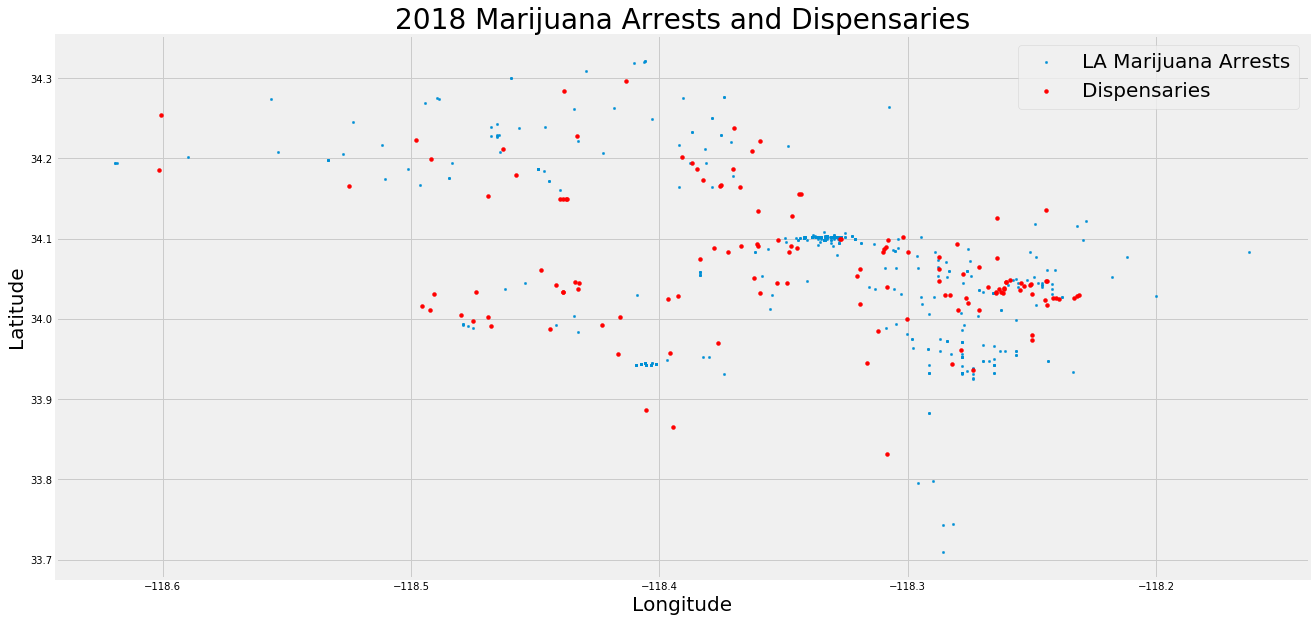

In [43]:
marijuana_disp(m_2015, 2015)
marijuana_disp(m_2016, 2016)
marijuana_disp(m_2017, 2017)
marijuana_disp(m_2018, 2018)

It appears that the densely clustered dispensaries also have densely clustered arrests around the (34.1, -118.35) mark, which is near Downtown Los Angeles.

### Scatterplot - Marijuana Arrests and School

For the following scatterplots, I want to examine if there is a relationship between the number of marijuana arrests per school.

In [40]:
def marijuana_school(df, year):
    fig, ax = plt.subplots(figsize =(20,10))
    plt.scatter(df['long'], df['lat'], label='LA Marijuana Arrests', s = 5)
    ax.scatter(LA_pub_school['long'], LA_pub_school['lat'], color='r', label='Schools', s = 7)
    plt.title(f'{year} Marijuana Arrests and Schools', fontsize=28)
    plt.xlabel('Longitude', fontsize=20)
    plt.ylabel('Latitude', fontsize=20)
    ax.legend(fontsize=20);

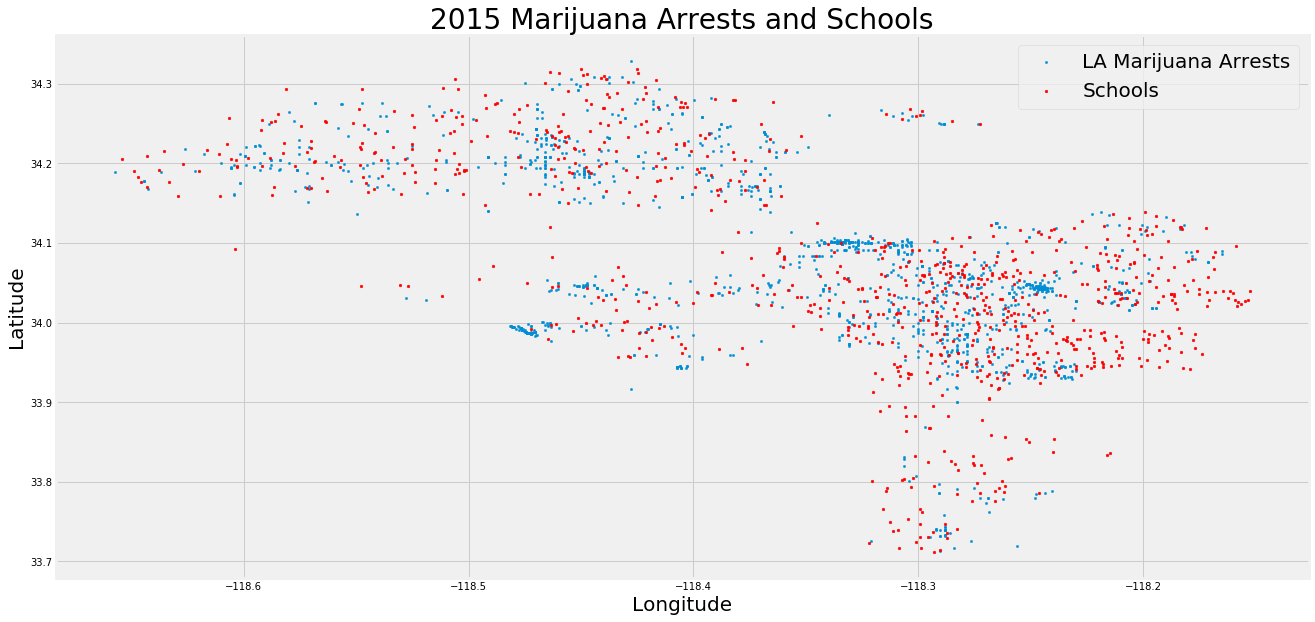

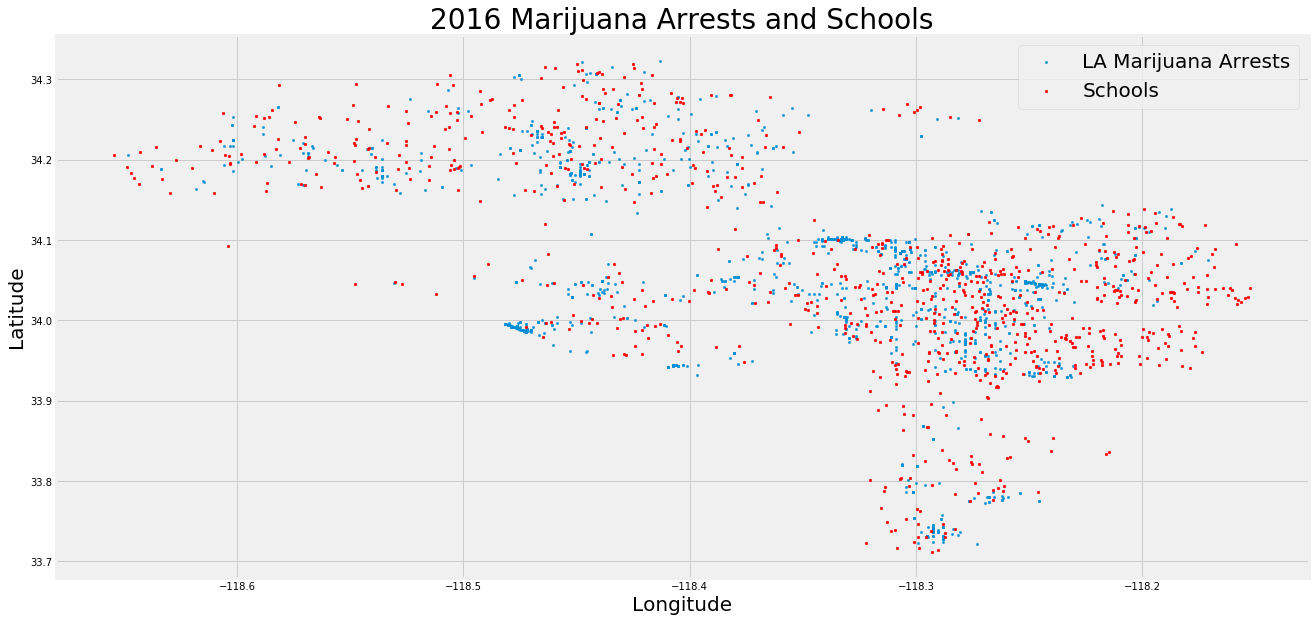

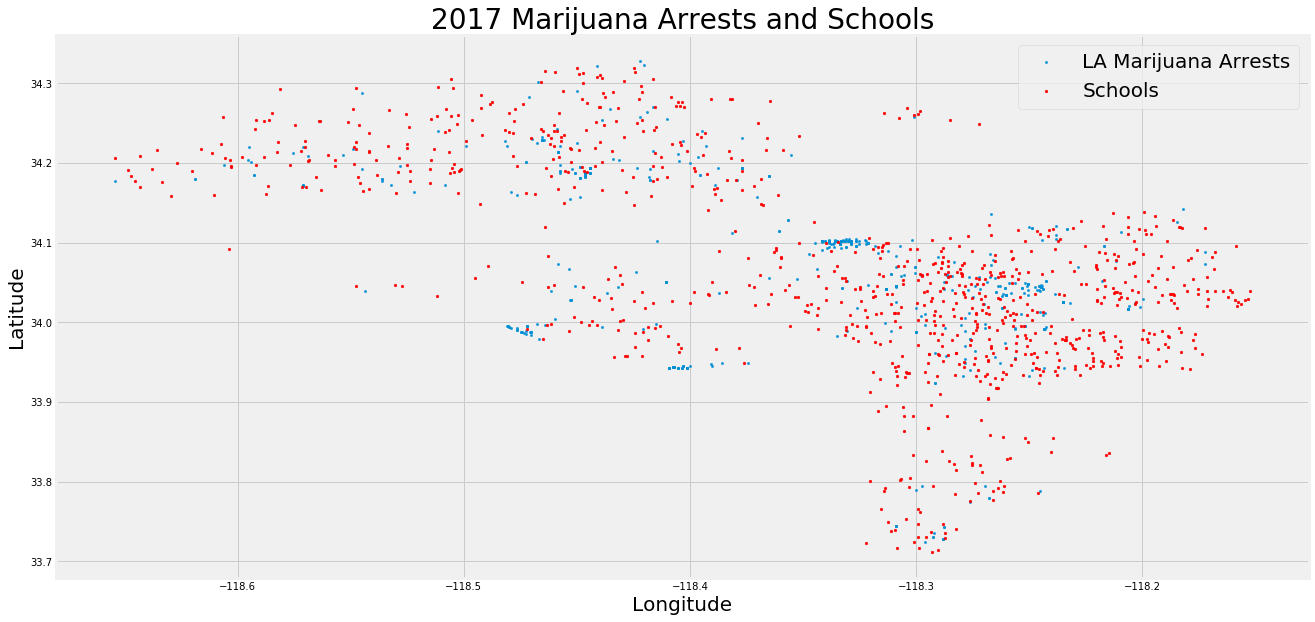

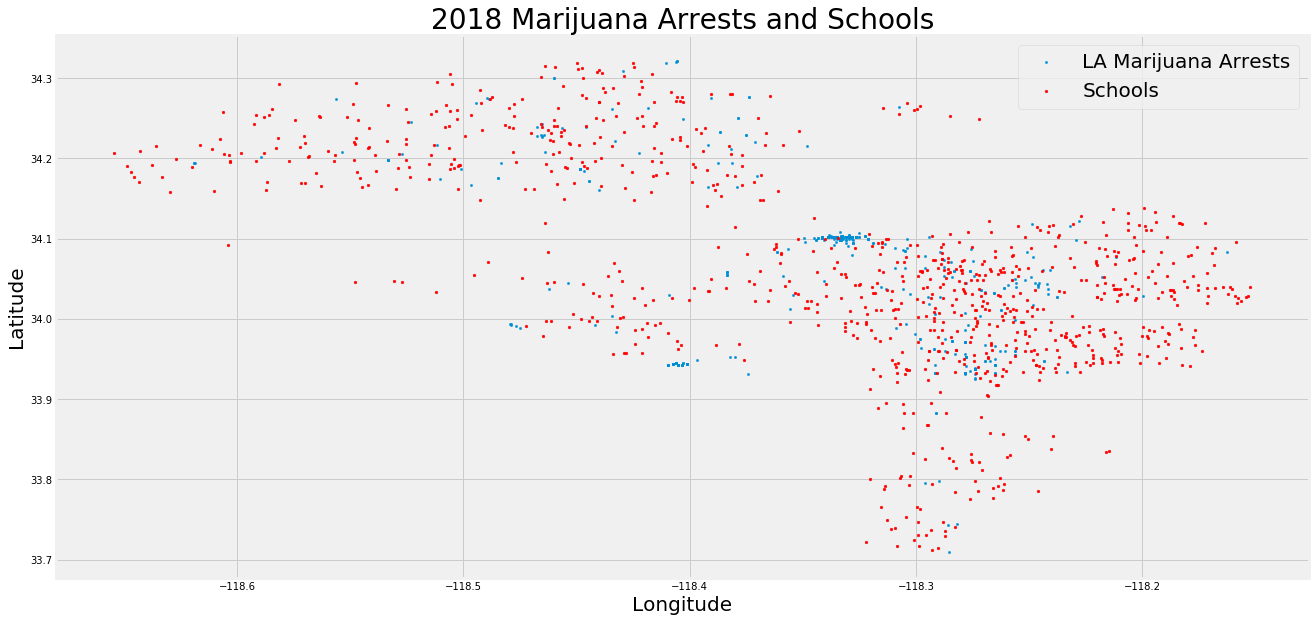

In [41]:
marijuana_school(m_2015, 2015)
marijuana_school(m_2016, 2016)
marijuana_school(m_2017, 2017)
marijuana_school(m_2018, 2018)

It is too difficult to see whether there is a geospatial relation between arrests and schools.

### Barplot - Top Marijuana Arrests

For the following bar plots, I want to examine the top 5 most common marijuana arrests over each year.

In [13]:
m_2015['Charge Description'].value_counts()

possession marijuana for sale                542
transport/sell/furnish/etc marijuana         387
possess 28.5 grams or less of marijuana      281
possess 28.5 grams or less of marijuana**    175
unlawfully plant/cultivate/etc marijuana      98
poss of more than 28.5 grams of marijuana     37
minor poss 28.5+ grams marijuana/school        8
give/transport/etc < 28.5 grams marijuana      6
minor poss < 28.5 grams marijuana/school       4
possess of marijuana while driving veh         3
attempt - sell/furnish/etc marijuana           3
furnishing marijuana to minor over 14 yrs      2
use minor under 14 trans/sell marijuana        2
transport/etc marijuana                        1
induce/etc minor to use/sell marijuana         1
Name: Charge Description, dtype: int64

`possess 28.5 grams or less of marijuana`  and `possess 28.5 grams or less of marijuana**` should be combined.

In [14]:
arrests['Charge Description'] = arrests['Charge Description'].map(lambda x: 'possess 28.5 grams or less of marijuana' if x == 'possess 28.5 grams or less of marijuana**' else x)
m_2015 = arrests[arrests['Arrest Date'] < '2016-01-01']
m_2016 = arrests[(arrests['Arrest Date'] < '2017-01-01') & (arrests['Arrest Date'] >= '2016-01-01')]
m_2017 = arrests[(arrests['Arrest Date'] < '2018-01-01') & (arrests['Arrest Date'] >= '2017-01-01')]
m_2018 = arrests[(arrests['Arrest Date'] < '2019-01-01') & (arrests['Arrest Date'] >= '2018-01-01')]

In [15]:
def marijuana_barplot(df, year):
    ax = df['Charge Description'].value_counts(ascending=True).tail().plot(kind='barh', figsize=(8,5),
                                                                            color= '#7D1B7E', fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(f'{year} Marijuana Arrests', fontsize = 23)
    ax.set_ylabel('Arrest Type', fontsize = 18);
    ax.set_xlabel('Count', fontsize = 18)

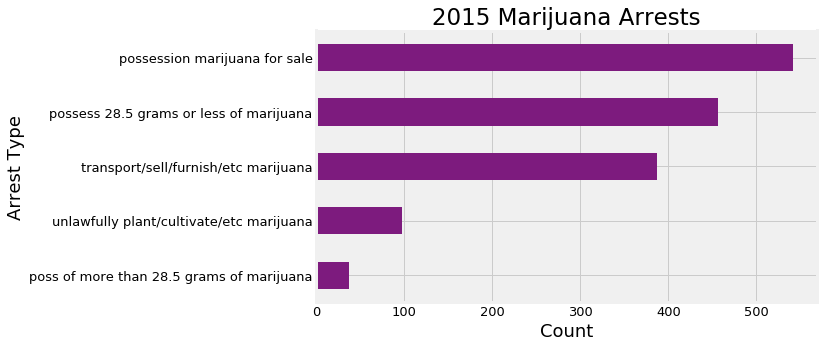

In [16]:
marijuana_barplot(m_2015, 2015)

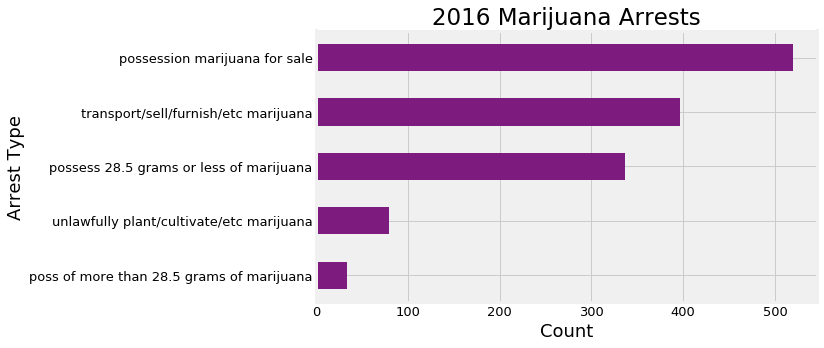

In [17]:
marijuana_barplot(m_2016, 2016)

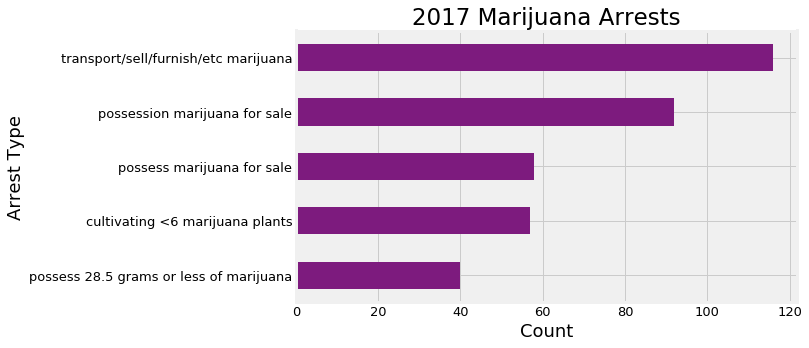

In [18]:
marijuana_barplot(m_2017, 2017)

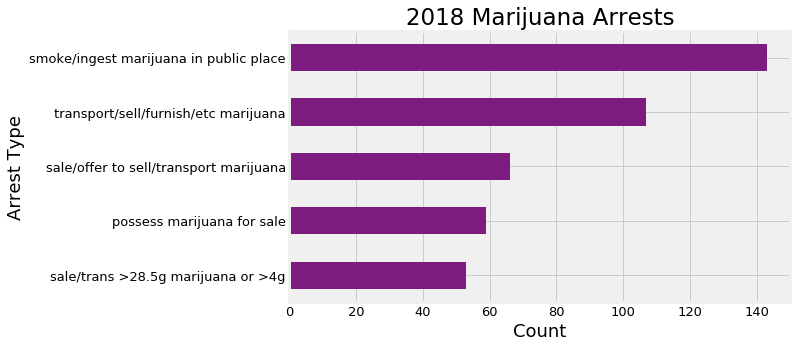

In [19]:
marijuana_barplot(m_2018, 2018)

It is interesting to note how the top marijuana arrest in 2015 and 2016 was `possession marijuana for sale` which can lead to more exposure amongst minors and teens. However, since the legalization of marijuana went into effect on January 1st, 2017, the leading cause of marijuana related arrests in 2018 switched to `smoking and ingesting marijuana in a public place`.

### Histograms - Arrests

In the following histograms, I will be examining whether numerical features, besides the coordinates, are normally distributed and checking for outliers.

In [20]:
arrests.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,4156.0,1514.710539,539.758381,1.0000,1300.000000,1600.0000,1900.0000,2358.0000
Age,4156.0,30.623917,11.239962,12.0000,22.000000,28.0000,37.0000,78.0000
lat,4156.0,34.061816,0.112313,33.7096,33.992000,34.0502,34.1154,34.3286
long,4156.0,-118.354730,0.093541,-118.6574,-118.426025,-118.3333,-118.2810,-118.1624
disp_0.5_mile,4156.0,0.896535,1.603209,0.0000,0.000000,0.0000,1.0000,11.0000
disp_1_mile,4156.0,2.566169,3.516398,0.0000,0.000000,1.0000,4.0000,21.0000
school_0.5_mile,4156.0,2.088306,1.874562,0.0000,1.000000,2.0000,3.0000,11.0000
school_1_mile,4156.0,7.911935,5.663015,0.0000,4.000000,7.0000,11.0000,31.0000


In [21]:
arrests_numeric_columns = arrests.describe().drop(['lat','long'],1).columns

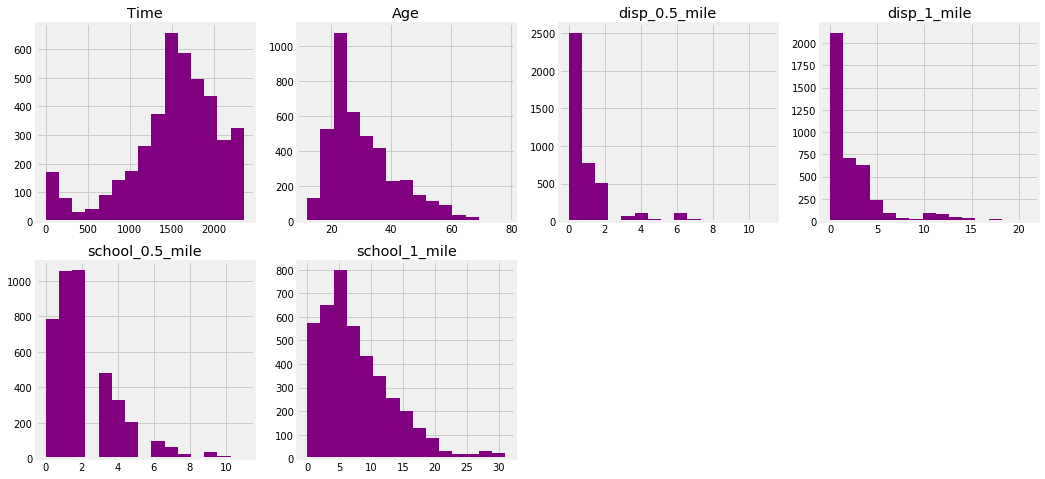

In [46]:
fig = plt.figure(figsize=(16,8))
for i, col in enumerate(arrests_numeric_columns): # for index and column name 
    fig.add_subplot(2,4,1+i) # create subplots, use index to increment 
    col_data = arrests[col] 
    plt.hist(col_data, bins=15, color = 'purple')
    plt.title(col)

It appears that `Time` shows a negative skew, which means the mode is greater than the mean, whereas the rest of the numerical variables are positively skewed, which means the mean is greater than the mode. None of the features appear to be normally distributed.

Observations:

`Time` 
- The time of the arrest is recorded military style, and it appears that most of the marijuana related arrests occur around 1500 which is 3 PM. Furthermore there are more arrests during the night than in the morning.
- This can be a point of concern as school typically ends at around 3:15 pm which could lead to further exposure to children.

`Age`
- Majority of marijuana users are millenials, roughly 20 to 30 year olds

`disp_0.5_mile` and `disp_1_mile`
- The number of dispensaries within a half mile and 1 mile of each arrest appear to be on the lower end. There seems to be less than 4 nearby dispensaries per arrest.

`school_0.5_mile` and `school_1_mile`
- The number of schools within a half mile and 1 mile of each arrest appear to be on the lower end as well.

### Histograms - LAUSD

I will examine the number of arrests within 0.5 miles and 1 mile of each LAUSD school in the `LA_pub_school` dataframe.

In [58]:
LA_pub_school[['arrest_0.5_mile','arrest_1_mile']].describe()

,arrest_0.5_mile,arrest_1_mile
count,909.000000,909.000000
mean,9.547855,36.173817
std,21.427451,50.048683
min,0.000000,0.000000
25%,1.000000,7.000000
50%,5.000000,20.000000
75%,12.000000,51.000000
max,445.000000,538.000000


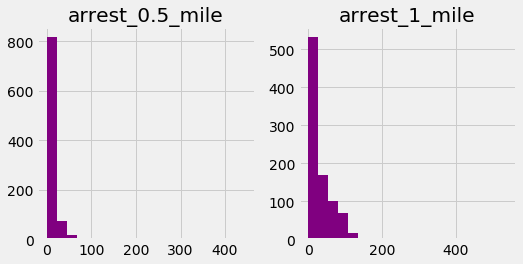

In [64]:
school_numeric_columns = ['arrest_0.5_mile','arrest_1_mile']

fig = plt.figure(figsize=(16,8))
for i, col in enumerate(school_numeric_columns): # for index and column name 
    fig.add_subplot(2,4,1+i) # create subplots, use index to increment 
    col_data = LA_pub_school[col] 
    plt.hist(col_data, bins = 20, color = 'purple')
    plt.title(col)

Again, the variables are positively skewed, which means that the mean is larger than the mode. 

### Normality Test - Arrests Numeric Columns

I will check whether `Time`, `Age`, `disp_0.5_mile`, `disp_1_mile`, `school_0.5_mile`, and `school_1_mile` follow a normal distribution.

In [50]:
def normality_test(dataframe, list_of_cols ,sig_level=0.05):
    
    total_variables = len(list_of_cols)
    not_normal_variables = 0
    for col in list_of_cols:
        p_val = stats.normaltest(dataframe[col])[1]
        sig_lvl = 0.05
        if p_val < sig_lvl:
            print(f'{col}')
            print(f'P-Val: {p_val}\nSignificance Level: {sig_lvl}\n')
            print("Since the p-value is less than the significance level, reject the null hypothesis and conclude that the data does not follow normal distribution.\n")
            not_normal_variables += 1
        elif p_val > sig_lvl:
            print(f'{col}')
            print(f'P-Val: {p_val}\nSignificance Level: {sig_lvl}\n')
            print("Since the p-value is greater than the significance level, we fail to reject the null hypothesis.\n")
    
    if not_normal_variables/total_variables == 1:
        print('For each variable, since the p-value is less than the significance level, reject the null hypothesis and conclude that the variable does not follow normal distribution.')
    else:
        print(f'{not_normal_variables} variables do not follow normal distribution')


In [51]:
normality_test(arrests, arrests_numeric_columns)

Time
P-Val: 5.2448317465700746e-114
Significance Level: 0.05

Since the p-value is less than the significance level, reject the null hypothesis and conclude that the data does not follow normal distribution.

Age
P-Val: 1.7083644208281703e-124
Significance Level: 0.05

Since the p-value is less than the significance level, reject the null hypothesis and conclude that the data does not follow normal distribution.

disp_0.5_mile
P-Val: 0.0
Significance Level: 0.05

Since the p-value is less than the significance level, reject the null hypothesis and conclude that the data does not follow normal distribution.

disp_1_mile
P-Val: 0.0
Significance Level: 0.05

Since the p-value is less than the significance level, reject the null hypothesis and conclude that the data does not follow normal distribution.

school_0.5_mile
P-Val: 9.030957752343969e-215
Significance Level: 0.05

Since the p-value is less than the significance level, reject the null hypothesis and conclude that the data does not

### Normality Test - LAUSD Numeric Columns

I will check whether `arrest_0.5_mile` or `arrest_1_mile` follows a normal distribution.

In [67]:
normality_test(LA_pub_school, school_numeric_columns)

arrest_0.5_mile
P-Val: 0.0
Significance Level: 0.05

Since the p-value is less than the significance level, reject the null hypothesis and conclude that the data does not follow normal distribution.

arrest_1_mile
P-Val: 6.005521573005592e-188
Significance Level: 0.05

Since the p-value is less than the significance level, reject the null hypothesis and conclude that the data does not follow normal distribution.

For each variable, since the p-value is less than the significance level, reject the null hypothesis and conclude that the variable does not follow normal distribution.


No variables follow a numerical distribution which means we must be cautious when modeling.

### Line Plot - Marijuana Arrests

The following line plots will show the overall trend of marijuana arrests on a month to month basis.

In [146]:
idx = pd.date_range('2015-01-01', '2019-04-11')

# filling 0 values for dates that do not have an arrest
mj_date = arrests.groupby('Arrest Date').sum().reindex(idx, fill_value=0)[['school_0.5_mile']]

# January 2015 had 375 schools within 0.5 miles a marijuana related arrest
mj_date.head(31).sum()

school_0.5_mile    375
dtype: int64

In [147]:
mj_date.resample('M').sum().head()

,school_0.5_mile
2015-01-31,375
2015-02-28,249
2015-03-31,264
2015-04-30,303
2015-05-31,262


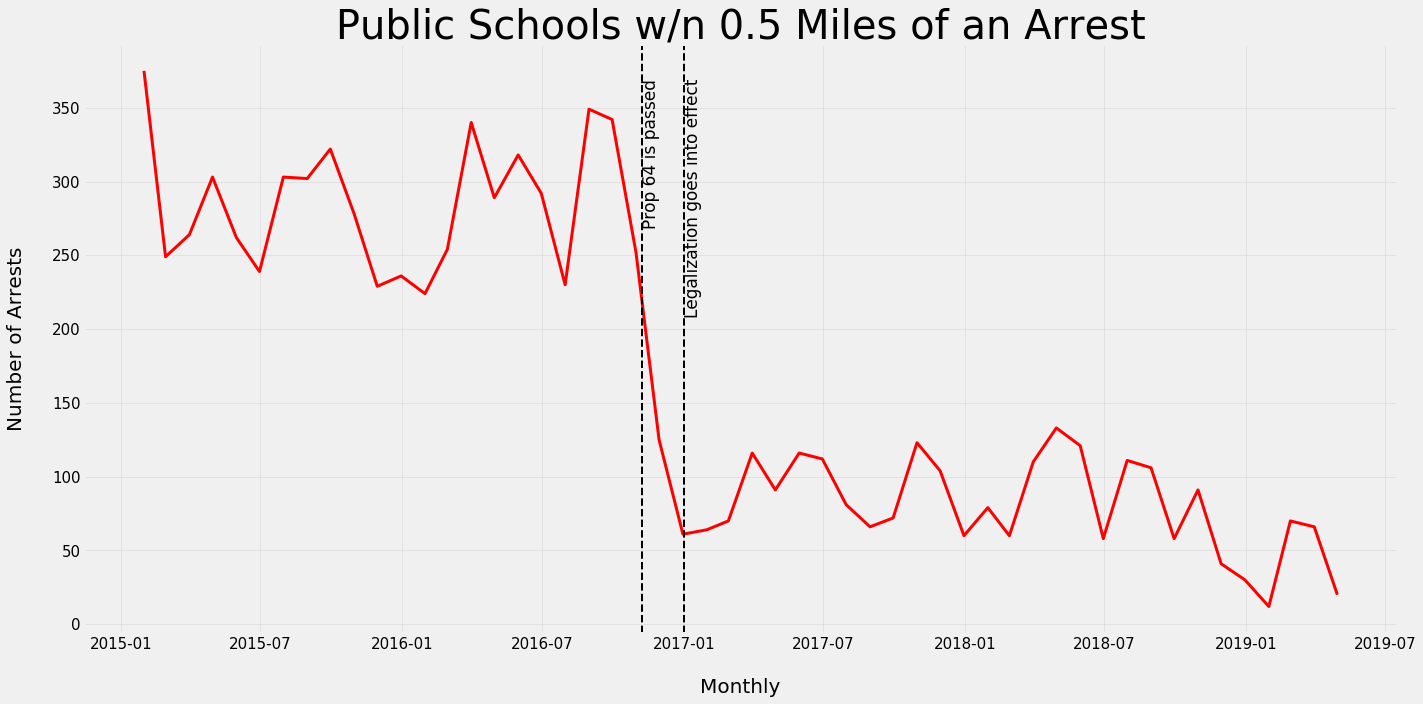

In [155]:
plt.figure(figsize=(20,10))
plt.plot(mj_date.resample('M').sum(), color='red', linewidth=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Public Schools w/n 0.5 Miles of an Arrest', fontsize=40)
plt.xlabel('\nMonthly', fontsize=20)
plt.ylabel('Number of Arrests\n', fontsize=20)
plt.grid(alpha=.4)

plt.axvline(x = '2016-11-08', ymin=0, ymax=21, color='k', linestyle='--', linewidth=2)
plt.text(x= '2016-11-08', y=360, s='Prop 64 is passed', rotation=90, fontsize=17)
plt.axvline(x='2017-01-01', ymin=0, ymax=21, color='k', linestyle='--', linewidth=2)
plt.text(x='2017-01-01', y=360, s='Legalization goes into effect', rotation=90, fontsize=17);

plt.tight_layout()
plt.savefig('../plots/marijuana_school.png');

The following line graph shows the monthly count of schools within a half mile distance between a marijuana related arrest per month between the beginning of 2015 and the beginning of 2019. Since the number of public schools is constant from 2015 to 2019, the number of marijuana arrests has been dropping since the passage of Prop 64. The risk of marijuana exposure to children is not that high to begin with. The maximum count of schools that were within 0.5 miles away from a marijuana arrest was 350, and it has now fluctuated between 50 and 150 since the legalization of marijuana. Taking into account 909 LA USD schools, the most recent data point at April 2019 only has 20 schools that are within 0.5 miles of marijuana related arrests, which is around 2% of total LAUSD schools. 

In [151]:
mj_date.resample('M').sum().tail(1)

,school_0.5_mile
2019-04-30,20


# Please go to Part 2C: Logistic Classification